In [10]:
import numpy as np
from collections import deque
from itertools import product


In [104]:
from cached_property import cached_property
from importlib import reload
import dynamic_poset
reload(dynamic_poset)
from dynamic_poset import Poset, PosetStorage
from poset_storage import KVStorage, Population

@Poset.set_property
def upside_down(self):
    return self.__class__.from_parents(self.children)

@Poset.set_property
def irreduced(self):
    return self.subgraph(self.irreducibles)

def carlos_test(L, F_aux):
    n = L.n
    J = L.irreducibles
    leq = L.leq
    p_to_p = sorted(
        #set(tuple(bot if leq[x,i] and x!=i else j for x in range(n)) for i in J for j in J)|
        set(tuple(bot if not leq[i,x] else j for x in range(n)) for i in J for j in J)|
        set()
    )
    s1 = set(p_to_p)
    s2 = set(F_aux)
    print(f'Carlos test: {s1==s2}')
    if s1!=s2:
        print(s1-s2)
        print(s2-s1)
    return



  |L| = 4
  |F| = 16
 |FJ| = 4
Hypothesis holds: True


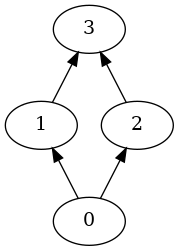

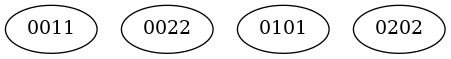

Carlos test: True
------------------------------
  |L| = 5
  |F| = 70
 |FJ| = 16
Hypothesis holds: True


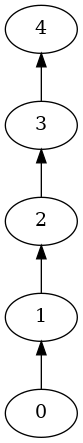

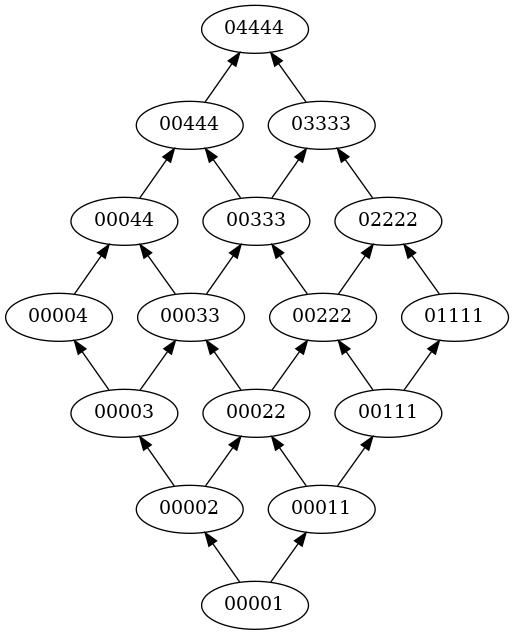

Carlos test: True
------------------------------
  |L| = 5
  |F| = 50
 |FJ| = 9
Hypothesis holds: True


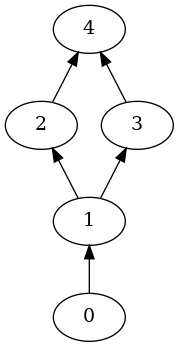

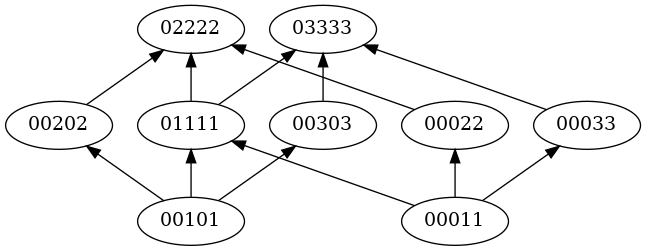

Carlos test: True
------------------------------
  |L| = 6
  |F| = 108
 |FJ| = 9
Hypothesis holds: True


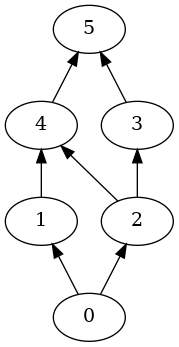

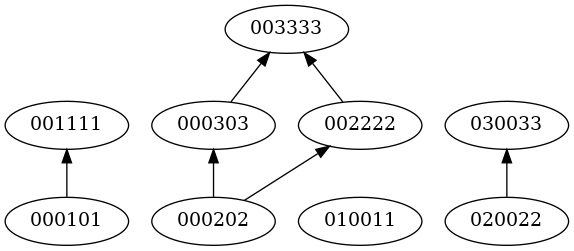

Carlos test: True
------------------------------
  |L| = 8
  |F| = 746
 |FJ| = 16
Hypothesis holds: True


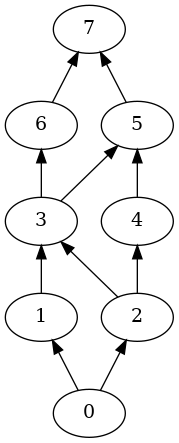

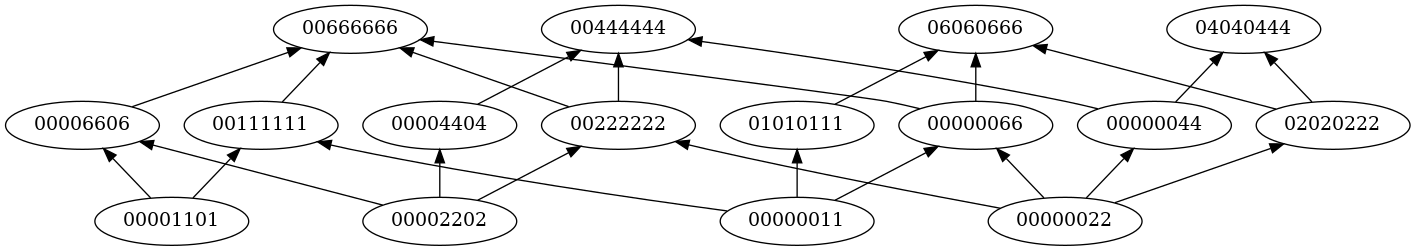

Carlos test: True
------------------------------


0

In [127]:


def march5(L):
    P = L.irreduced
    Q = P * P.upside_down
    
    def make_poset(n, F, leq):
        m = len(F)
        Fleq = np.zeros((m, m), dtype=bool)
        for i in range(m):
            Fi = F[i]
            for j in range(m):
                Fj = F[j]
                Fleq[i,j] = all(leq[Fi[x],Fj[x]] for x in range(n))
        Fleq.flags.writeable = False
        return Poset(Fleq)
    
    Funcs = list(map(tuple, L.iter_f_irreducibles_monotone_bottom()))
    F = make_poset(L.n, Funcs, L.leq)
    FJ = F.subgraph(F.irreducibles)
    print(f'  |L| = {L.n}\n  |F| = {F.n}\n |FJ| = {FJ.n}\nHypothesis holds: {FJ==Q}')
    assert FJ == Q, (FJ.show(), Q.show())
    L.show()
    F_aux = [tuple(Funcs[i]) for i in F.irreducibles]
    labels = [''.join(map(str,f)) for f in F_aux]
    FJ.show(labels=labels)
    carlos_test(L, F_aux)
    print('-'*30)
    return

examples = [
    (Poset.total(2) * Poset.total(2)),
    Poset.total(5),
    Poset.total(1) + (Poset.total(2) * Poset.total(2)),
    (Poset.total(2) | Poset.total(1)).downset_closure,
    Poset.from_children([[], [], [0], [0,1]]).downset_closure,
]
sum(march5(L) or 0 for L in examples)